# <center>ITS307 Data Analytics : Autumn Semester 2022</center>

# <center>Practical 12</center>

# <center>KMean Clustering</center>

![image-14.png](attachment:image-14.png)

# <font color="blue">Table of Contents 
<ol start="0">
<li> Learning Objectives </li>
<li> Train test Split </li>
<li> Train Linear Model</li>
<li> Train Non Linear Model</li>
<li> Train Complex Model </li>
<li> Train Regularized Model</li>
</ol>

## <font color = blue>0. Learning Objectives

Use Kmean algorithm to implement unsupervised clustering for iris dataset.

By the end of the lab, you should be able to :
- Differentiate supervised and unsupervised learning.


- Implement Kmean clustering any given dataset.





## <font color = blue>1. Loading Data

    - Lets load iris dataset for clustering. Note that you don't have to include target for unsupervised learning.
    

In [1]:
#import libraries first
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

In [2]:
#Load datasets
iris =load_iris()
iris.keys()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()



sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

## <font color = blue> 2. Data Manipulationa and visualization

In [3]:
#visualize your data here
df.drop(['sepal length (cm)', 'sepal width (cm)'], axis=1, inplace=True)
df.dtypes


petal length (cm)    float64
petal width (cm)     float64
dtype: object

In [4]:
sns.pairplot(df)
plt.show()



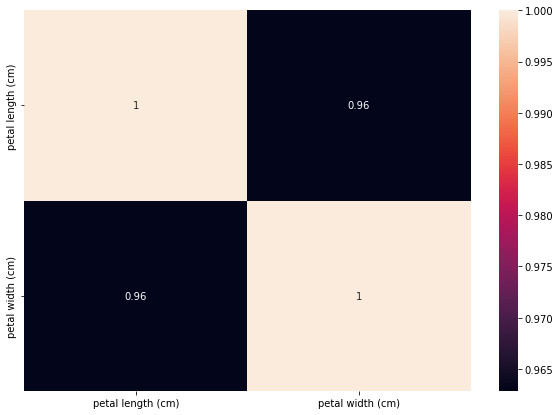

In [5]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=True)
plt.show()

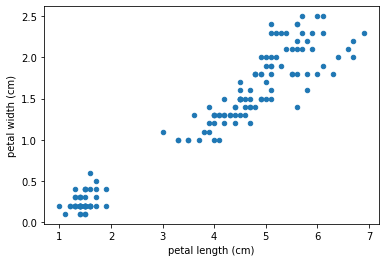

In [6]:
df.plot(kind='scatter', x="petal length (cm)", y="petal width (cm)")
plt.show()

## <font color = blue> 3. Train model

In [7]:
#train your model here
kmeans = KMeans(n_clusters=3,init = 'k-means++', max_iter = 100, n_init = 10, random_state = 0)






In [8]:
y_kmeans = kmeans.fit_predict(df)

In [9]:
y_kmeans


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

## <font color = blue> 4. Explore KMeans attributes

In [10]:
#check Kmean algorithm's attribute
kmeans.n_features_in_



2

In [11]:
kmeans.cluster_centers_


array([[1.462     , 0.246     ],
       [5.59583333, 2.0375    ],
       [4.26923077, 1.34230769]])

## <font color = blue> 5. Prediction

In [12]:
#create sample data to make prediction. Interpret your output for unsupervised clustering
kmeans.predict([[0, 0], [12, 3]])



C:\Users\Lab-1\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([0, 1])

## <font color = blue> 6. Plotting clusters with thier centroids

In [13]:
# Plot your datapoints and show the clusters in different colors along with thier cluster centroids.
kmeans.cluster_centers_


array([[1.462     , 0.246     ],
       [5.59583333, 2.0375    ],
       [4.26923077, 1.34230769]])

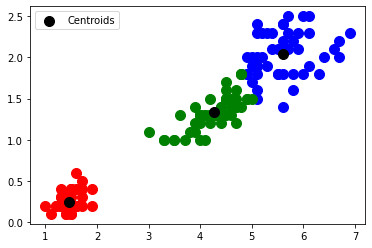

In [14]:
x=df.iloc[:,0:3].values
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1],s = 100, c = 'red')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1],s = 100, c = 'blue')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],s = 100, c = 'green')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'black', label = 'Centroids')

plt.legend()

## <font color = blue> 7. Use elbow method to choose K for Kmean

C:\Users\Lab-1\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Lab-1\AppData\Local\Temp\ipykernel_15464\173339896.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(range(1, 4), css, 'bx-', color='red')


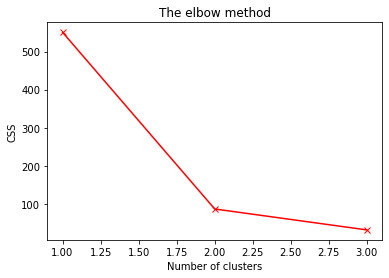

In [19]:


css=[]

# Finding inertia on various k values
for i in range(1,4):
    kmeans=KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 100, n_init = 10, random_state = 0).fit(x)
    css.append(kmeans.inertia_)
    
plt.plot(range(1, 4), css, 'bx-', color='red')
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('CSS') 
plt.show()

